# 变换
在图形学中，常见的几种变换包括：

平移变换（Translation Transformation）：将图像在平面上沿着指定的方向移动一定的距离，通过改变图像的位置实现平移效果。

缩放变换（Scaling Transformation）：通过改变图像的尺寸，使图像在水平和垂直方向上按比例进行放大或缩小。

旋转变换（Rotation Transformation）：围绕图像的中心或指定的旋转点，按照指定的角度进行旋转操作，改变图像的方向或角度。

翻转变换（Flip Transformation）：将图像在水平或垂直方向上进行翻转，使得图像的内容在水平或垂直方向上反转。

仿射变换（Affine Transformation）：通过平移、旋转、缩放和剪切等组合操作，改变图像的形状和位置，可以保持直线的平行性和长度比例。

透视变换（Perspective Transformation）：通过指定四个点的坐标关系，将图像投影到一个新的视平面，从而改变图像的透视效果。

形态学变换（Morphological Transformation）：基于图像形状的处理技术，包括腐蚀（Erosion）、膨胀（Dilation）、开运算（Opening）、闭运算（Closing）等，用于图像的形状分析和改变。

这些变换可以用于图像处理和计算机图形学中的多种应用，例如图像编辑、图像增强、目标检测、图像配准等。

## 缩放
1. 需要指定图像大小或者比例因子  
2. 下采样(图像上缩小)，最合适的插值方法是 cv.INTER_AREA 对于
3. 上采样(图像上放大),最好的方法是 cv.INTER_CUBIC （速度较慢）和 cv.INTER_LINEAR (速度较快)。
4. 默认情况下，所使用的插值方法都是 cv.INTER_AREA 。

In [ ]:
import numpy as np
import cv2 as cv

# 读取图像
img = cv.imread('messi.jpg')

# 使用缩放因子进行图像尺寸调整
res = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC)

# 或者通过指定目标尺寸进行图像调整
height, width = img.shape[:2]
res = cv.resize(img, (2*width, 2*height), interpolation=cv.INTER_CUBIC)

# 在窗口中显示原始图像和调整后的图像
cv.imshow('Original Image', img)
cv.imshow('Resized Image', res)

# 等待按键响应
cv.waitKey(0)

# 关闭窗口
cv.destroyAllWindows()


## 平移

In [ ]:
import numpy as np
import cv2 as cv

# 加载图像（以灰度模式）
img = cv.imread('messi.jpg', 0)
# 将灰度图像转换为彩色图像
color_img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
print(color_img.shape)

# 显示彩色图像
cv.imshow('Color Image', color_img)
# 获取图像的行数和列数
rows, cols = img.shape
# 定义平移矩阵
matrix = np.float32([[1, 0, 100], [0, 1, 50]])

# 对图像进行仿射变换（平移操作）
dst = cv.warpAffine(img, matrix, (cols, rows))

# 在窗口中显示平移后的图像
cv.imshow('Translated Image', dst)

# 等待按键响应
cv.waitKey(0)

# 关闭窗口
cv.destroyAllWindows()


## 旋转
指定旋转中心以及角度等参数 生成变换矩阵
getRotationMatrix2D()

In [ ]:
import numpy as np
import cv2 as cv
img = cv.imread('messi.jpg',0)
rows,cols = img.shape
# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
#M = cv.getRotationMatrix2D(((50,50)),90,1)
print(M)
dst = cv.warpAffine(img,M,(cols,rows))
# 在窗口中显示平移后的图像
cv.imshow('Translated Image', dst)

# 等待按键响应
cv.waitKey(0)

# 关闭窗口
cv.destroyAllWindows()

## 仿射变换
目前看起来是吧前面三个点 变换到了你指定的位置

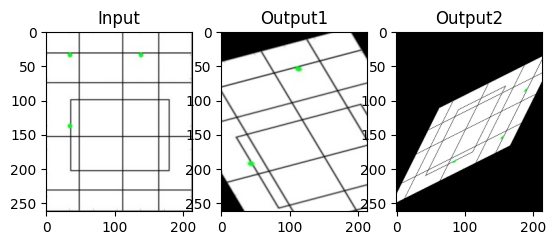

In [39]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# 读取图像
img = cv.imread('drawing.jpg')
rows, cols, ch = img.shape

# 定义原始图像和目标图像中的三个点
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
pts3 = np.float32([[150, 150], [200, 50], [50, 200]])

# 计算仿射变换矩阵
matrix1 = cv.getAffineTransform(pts1, pts2)
matrix2 = cv.getAffineTransform(pts1, pts3)
# 应用仿射变换
dst1 = cv.warpAffine(img, matrix1, (cols, rows))
dst2 = cv.warpAffine(img, matrix2, (cols, rows))

# 绘制输入图像和输出图像的子图
plt.subplot(131), plt.imshow(img), plt.title('Input')
plt.subplot(132), plt.imshow(dst1), plt.title('Output1')
plt.subplot(133), plt.imshow(dst2), plt.title('Output2')
plt.show()


## 透视变换
有点像放大?

(563, 558, 3)


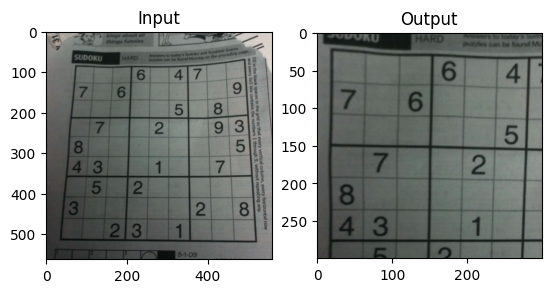

In [8]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('../data/sudoku.png')
print(img.shape)
rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()
